**Questions to be answered in this jupyter notebook:**
- Question 1. During which time range in a year, do we have the most amount of offer info provided? 
   We can plan our job hunting time accordingly.
- Question 2. What are the top companies offering the largest number of job opportunities? Have they changed over the past several years?

- Question 3. Who has got the largest number of opportunities and when?

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('offers_US.csv', encoding='utf-8')

In [3]:
df.shape

(8234, 8)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8234 entries, 0 to 8233
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        8234 non-null   datetime64[ns]
 1   Poster      6782 non-null   object        
 2   Replies     8234 non-null   int64         
 3   Views       8234 non-null   int64         
 4   post_id     8234 non-null   int64         
 5   post_title  8234 non-null   object        
 6   company     7842 non-null   object        
 7   experience  8145 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 386.0+ KB


In [6]:
df.head()

,Date,Poster,Replies,Views,post_id,post_title,company,experience
0,2020-08-26,NaN,4,796,663689,InstaCart 值得去么？,InstaCart,硕士+(5-10年)
1,2020-08-26,korason,22,1699,663548,脸书E5 没有sign on的包裹,Facebook,本科+(5-10年)
2,2020-08-26,懒的像猪,2,564,663508,亚麻SDEIII地板包,Amazon,博士+(5-10年)
3,2020-08-26,NaN,31,3655,663488,让人超级无语的亚麻offer，如果你是我的话你会去吗,Amazon,硕士+(5-10年)
4,2020-08-26,minddrummer,2,375,663481,atlassian MLE 包,atlassian,博士+(3-5年)


### Remove the post containing "求内推(asking for help)"

In [7]:
df['is_referral'] = df['post_title'].apply(lambda x :0 if '求' in x else 1)

In [8]:
df.head(5)

,Date,Poster,Replies,Views,post_id,post_title,company,experience,is_referral
0,2020-08-26,NaN,4,796,663689,InstaCart 值得去么？,InstaCart,硕士+(5-10年),1
1,2020-08-26,korason,22,1699,663548,脸书E5 没有sign on的包裹,Facebook,本科+(5-10年),1
2,2020-08-26,懒的像猪,2,564,663508,亚麻SDEIII地板包,Amazon,博士+(5-10年),1
3,2020-08-26,NaN,31,3655,663488,让人超级无语的亚麻offer，如果你是我的话你会去吗,Amazon,硕士+(5-10年),1
4,2020-08-26,minddrummer,2,375,663481,atlassian MLE 包,atlassian,博士+(3-5年),1


In [9]:
# Remove the post requesting help.
df = df[df['is_referral']==1]; len(df)

7639

# - Question 1. During which time range in a year, do we have the most amount of referrals provided? 


## Lets count how many posts created for each day.

Text(0.5, 1.0, 'daily number of posts for all years')

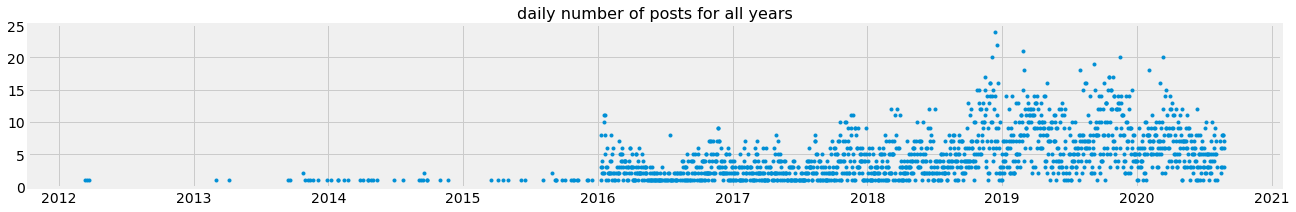

In [10]:
daily_count = df.groupby('Date').count()

plt.figure(figsize=(20,3))
plt.plot(daily_count['post_id'], marker='.', linestyle='')
# plt.xlim((pd.to_datetime('2014-07-01'), pd.to_datetime('2020-07-01')))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('daily number of posts for all years',fontsize=16)

Text(0.5, 1.0, 'daily counts of posts')

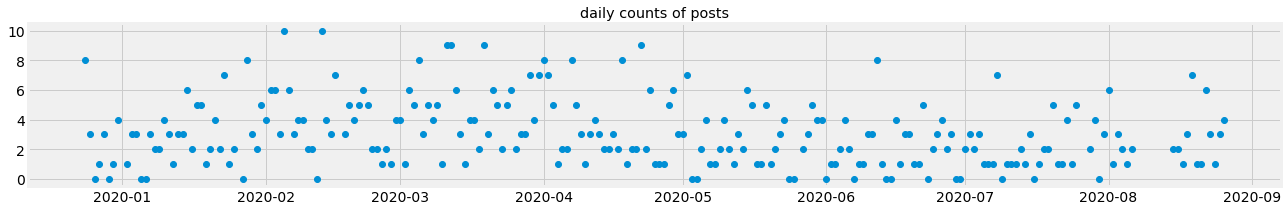

In [20]:
plt.figure(figsize=(20,3))
plt.plot(daily_count['2019-12-24':].index, daily_count['2019-12-24':].Poster, marker='o', linestyle='')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('daily counts of posts')

### Make weekly counts

In [12]:
df = df.set_index('Date')

Text(0.5, 1.0, 'Weekly counts of posts')

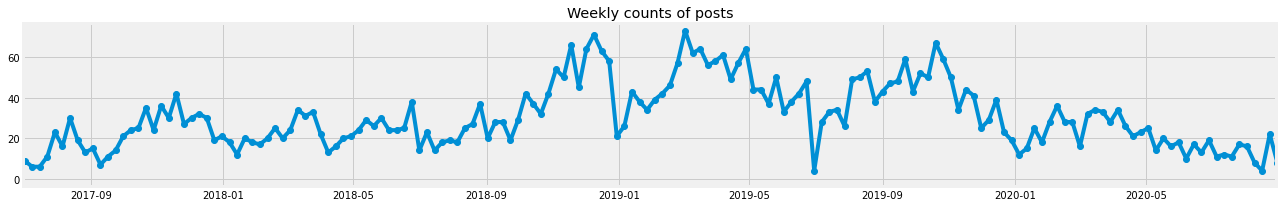

In [21]:
df_week_counts = df.resample('W').count() 

plt.figure(figsize=(20,3))
plt.xlim((pd.to_datetime('2017-07-01'), pd.to_datetime('2020-08-29')))
plt.plot(df_week_counts.index, df_week_counts.Poster, marker='o', linestyle='-')
plt.title('Weekly counts of posts')

### Make Monthly counts

Text(0.5, 1.0, 'Monthly counts of posts')

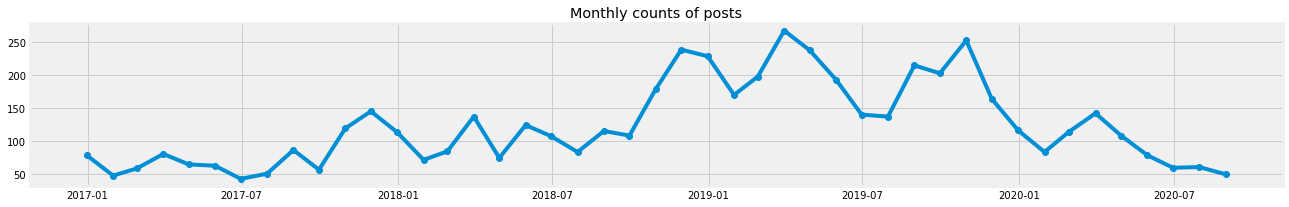

In [23]:
df_monthly_counts = df.resample('M').count() 

plt.figure(figsize=(20,3))
plt.plot(df_monthly_counts['2016-12-24':].index, df_monthly_counts['2016-12-24':].Poster, marker='o', linestyle='-')
plt.title('Monthly counts of posts')

#### We can see that the September is the peak month in the year for companies offering opportunities.

Text(0.5, 1.0, 'Rolling averages of daily posts offering internal referrals')

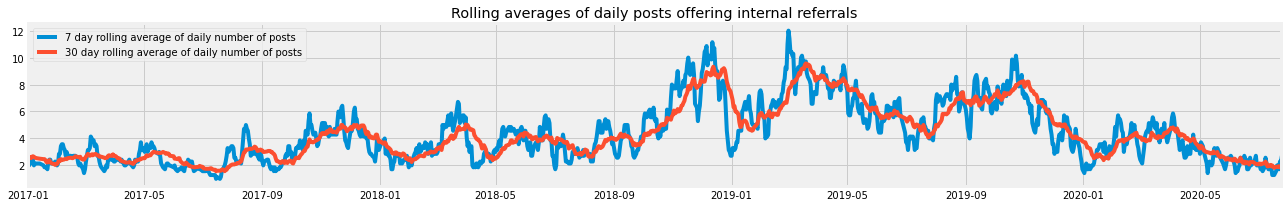

In [15]:
df_new = df.groupby('Date').count()

daily_post_avg_7 = df_new.rolling(7).mean()['Poster']
daily_post_avg_30 = df_new.rolling(28).mean()['Poster']

plt.figure(figsize=(20, 3))
plt.plot(daily_post_avg_7, label='7 day rolling average of daily number of posts')
plt.plot(daily_post_avg_30, label='30 day rolling average of daily number of posts')
plt.xlim((pd.to_datetime('2017-01-01'), pd.to_datetime('2020-07-24')))
plt.legend()
plt.title('Rolling averages of daily posts offering internal referrals')
# plt.xticks([0, 1, 2], ['January', 'February', 'March'])

## - Question 2. What are the top companies offering the largest number of referral opportunities? Have they changed over the past several years?

In [16]:
posts_per_company = df['company'].value_counts()[:20]; posts_per_company.head()

Amazon       1158
Google        781
Microsoft     670
Facebook      600
Apple         244
Name: company, dtype: int64

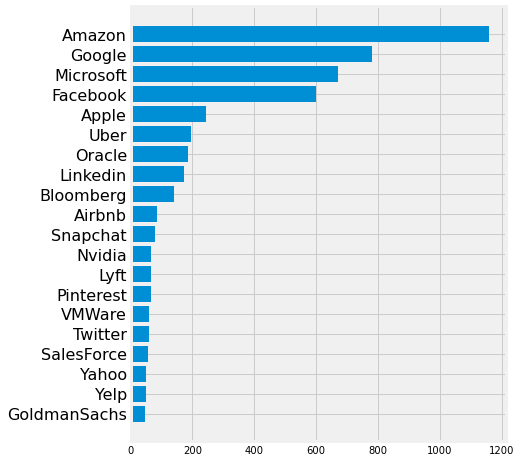

In [17]:
plt.figure(figsize=(6,8))
plt.barh(posts_per_company.index, posts_per_company.values)
plt.yticks(fontsize=16)
plt.gca().invert_yaxis()

## - Question 3. Who has created the largest amount of referrals?
### Top ten author ordered by number of posts and average views

In [18]:
poster_info = df.groupby(['Poster']).agg({'Views': ['count','sum', 'mean', 'min', 'max'], 'Replies': ['mean', 'min', 'max']})
poster_info.columns = ['_'.join(x) for x in poster_info.columns.ravel()]
poster_info.sort_values(by=['Views_count', 'Views_mean'], ascending=False).head(10)

,Views_count,Views_sum,Views_mean,Views_min,Views_max,Replies_mean,Replies_min,Replies_max
Poster,,,,,,,,
g56422,17,21841,1284.764706,471,2485,2.235294,0,6
diyutianshi,13,58871,4528.538462,1988,8022,8.153846,3,24
zhjdenis,11,33876,3079.636364,797,7964,7.727273,0,30
shiloh00,9,107635,11959.444444,3597,27370,38.888889,12,101
PENETRATIVE,9,36661,4073.444444,2358,5498,11.444444,7,20
hexuanus,9,18123,2013.666667,1251,2726,4.000000,1,10
wx6807,9,8859,984.333333,164,2916,7.555556,0,21
weapon3042,8,29905,3738.125000,2361,6472,12.625000,3,27
ted7726,8,25081,3135.125000,1514,8627,8.125000,2,31


In [19]:
df[df.Poster=='diyutianshi']

,Poster,Replies,Views,post_id,post_title,company,experience,is_referral
Date,,,,,,,,
2016-08-16,diyutianshi,13,5159,199492,Houzz Offer,Houzz,博士+(3-5年),1
2016-08-16,diyutianshi,4,3184,199491,Thumbtack Offer,Thumbtack,博士+(3-5年),1
2016-08-16,diyutianshi,3,4011,199490,Google T4 Offer,Google,博士+(3-5年),1
2016-07-16,diyutianshi,9,5022,195397,Senior Software Engineer @ Pinterest,Pinterest,博士+(3-5年),1
2016-07-15,diyutianshi,15,6005,195361,E5 @ Facebook,Facebook,博士+(3-5年),1
2016-07-15,diyutianshi,4,3255,195359,Senior Machine Learning Engineer @ Niantic,Niantic,博士+(3-5年),1
2016-07-15,diyutianshi,6,5762,195358,Senior Software Engineer @ LinkedIn,Linkedin,博士+(3-5年),1
2016-07-15,diyutianshi,4,3687,195357,Senior Software Engineer @ Uber,Uber,博士+(3-5年),1
2016-07-15,diyutianshi,24,8022,195356,Senior Software Engineer @ Airbnb,Airbnb,博士+(3-5年),1
